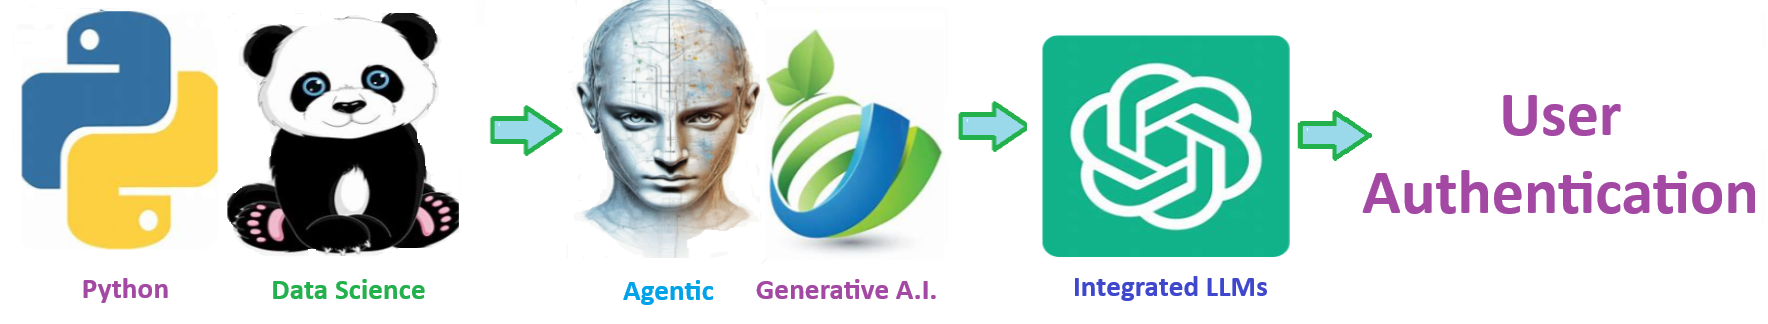

## 🧠 Authentication is the process of verifying a user’s identity before granting access to a system.

### 5 sustainable practices for managing users and their passwords:

1. **Use strong password policies** – require minimum length, complexity (letters, numbers, symbols), and regular updates.

2. **Implement multi-factor authentication (MFA)** – add an extra layer beyond passwords, such as codes, biometrics, or tokens.

3. **Store passwords securely** – always hash and salt passwords with modern algorithms (e.g., bcrypt, Argon2) instead of storing them in plain text.

4. **Enable self-service password resets** – let users securely reset passwords through email/phone verification to reduce admin workload.

5. **Review and revoke access regularly** – remove inactive accounts and audit user roles/permissions to ensure least-privilege access.


> Created by **ThriveAI  ...      Joe Eberle**  
> 🗓️ Started: April 18, 2025 
> 📫 Contact: [josepheberle@outlook.com](mailto:josepheberle@outlook.com)  
> 🔗 GitHub: [JoeEberle](https://github.com/JoeEberle/)


In [1]:
import os
import schedule
from datetime import datetime
import pandas as pd 
import authentication_management as am
import quick_logger as ql
import talking_code as tc 
import file_manager as fm 
import story_board as sb 
import postgres_utils as pg 
import time
from IPython.display import Markdown, display, Image
print(f"Libraries Imported succesfully on {datetime.now().date()} at {datetime.now().time()}") 

2025-08-27 21:28:07.736 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-08-27 21:28:08.113 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-27 21:28:08.130 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-27 21:28:08.136 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-27 21:28:08.140 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


Libraries Imported succesfully on 2025-08-27 at 21:28:08.268901


## Optional Step 0 - Intitiate Configuration Settings and name the overall solution

In [2]:
import configparser 
config = configparser.ConfigParser()
cfg = config.read('config.ini')  

solution_name = 'Authentication'

## Optional Step 0 - Intitiate Logging and debugging 

In [3]:
# Establish the Python Logger  
import logging # built in python library that does not need to be installed 
import quick_logger as ql

global start_stime 
start_time = ql.set_start_time()
logging = ql.create_logger_start(solution_name, start_time) 
ql.set_speaking_log(False)
ql.set_speaking_steps(False)
ql.pvlog('info',f'Process {solution_name} Step 0 - Initializing and starting Logging Process.') 

Process Authentication Step 0 - Initializing and starting Logging Process.


In [4]:
definition ='''
## 🧠 Authentication is the process of verifying a user’s identity before granting access to a system.

### 5 sustainable practices for managing users and their passwords:

1. **Use strong password policies** – require minimum length, complexity (letters, numbers, symbols), and regular updates.

2. **Implement multi-factor authentication (MFA)** – add an extra layer beyond passwords, such as codes, biometrics, or tokens.

3. **Store passwords securely** – always hash and salt passwords with modern algorithms (e.g., bcrypt, Argon2) instead of storing them in plain text.

4. **Enable self-service password resets** – let users securely reset passwords through email/phone verification to reduce admin workload.

5. **Review and revoke access regularly** – remove inactive accounts and audit user roles/permissions to ensure least-privilege access.

'''

sb.start_story(definition)


## 🧠 Authentication is the process of verifying a user’s identity before granting access to a system.

### 5 sustainable practices for managing users and their passwords:

1. **Use strong password policies** – require minimum length, complexity (letters, numbers, symbols), and regular updates.

2. **Implement multi-factor authentication (MFA)** – add an extra layer beyond passwords, such as codes, biometrics, or tokens.

3. **Store passwords securely** – always hash and salt passwords with modern algorithms (e.g., bcrypt, Argon2) instead of storing them in plain text.

4. **Enable self-service password resets** – let users securely reset passwords through email/phone verification to reduce admin workload.

5. **Review and revoke access regularly** – remove inactive accounts and audit user roles/permissions to ensure least-privilege access.



In [5]:
sb.add_image("sustainable_user_management.png")

![Image](sustainable_user_management.png)



In [6]:
help(am)

Help on module authentication_management:

NAME
    authentication_management

FUNCTIONS
    authenticate_user(user_id, password)

    get_user_list_excel(file_name='user_list.xlsx')
        returns a dataframe of users. Reads Excel File into a Dataframe

    persist_user_list(df)
        Save the entire DataFrame as a single JSON array of objects.

    save_user_list_excel(df, file_name='user_list.xlsx')
        Save DataFrame to Excel file.

    save_user_list_json_array(df, file_name='user_list.json')
        Save the entire DataFrame as a single JSON array of objects.

    save_user_list_parquet(df, file_name='user_list.parquet')
        Save DataFrame to Parquet file.

    save_user_list_sqlite(df, db_file='db.sqlite3.db', table_name='user_list')
        Save DataFrame to SQLite database table.

FILE
    c:\users\josep\authentication\authentication_management.py




In [7]:
import hashlib
password_to_hash =  'password'
hash_test = hashlib.sha256(password_to_hash.encode()).hexdigest()
print(hash_test)

5e884898da28047151d0e56f8dc6292773603d0d6aabbdd62a11ef721d1542d8


In [8]:
df_user_list = am.get_user_list_excel()
print(f"there are {df_user_list.shape[0]} users ")
df_user_list['password'] = hash_test
# df_user_list['hashed_password'] = 'hashed_password'  
# df_user_list['stauth_hashed_password'] = stauth.Hasher.generate()
# df_user_list['hashlib_hashed_password'] = hashlib.sha256(password.encode()).hexdigest()
df_user_list.head(20)

✅ Read File Successfully : 23 
there are 23 users 


,FullName,First Name,Last Name,UserID,org_email,personal email,Personal or Org Email,corporate_email,registered_email,Instance,start_password,password
0,Dan Porreca,Dan,Porreca,dporreca,@wnyhealthelink.com,NaN,O,dporreca@wnyhealthelink.com,dporreca@wnyhealthelink.com,healthelink,password,5e884898da28047151d0e56f8dc6292773603d0d6aabbd...
1,Jennifer Lane,Jennifer,Lane,jlane,@wnyhealthelink.com,NaN,O,jlane@wnyhealthelink.com,jlane@wnyhealthelink.com,healthelink,password,5e884898da28047151d0e56f8dc6292773603d0d6aabbd...
2,Denise Marshall,Denise,Marshall,dmarshall,@wnyhealthelink.com,NaN,O,dmarshall@wnyhealthelink.com,dmarshall@wnyhealthelink.com,healthelink,password,5e884898da28047151d0e56f8dc6292773603d0d6aabbd...
3,Stephen Gates,Stephen,Gates,sgates,@wnyhealthelink.com,NaN,O,sgates@wnyhealthelink.com,sgates@wnyhealthelink.com,healthelink,password,5e884898da28047151d0e56f8dc6292773603d0d6aabbd...
4,Casey Cannon,Casey,Cannon,ccannon,@wnyhealthelink.com,NaN,O,ccannon@wnyhealthelink.com,ccannon@wnyhealthelink.com,healthelink,password,5e884898da28047151d0e56f8dc6292773603d0d6aabbd...
5,Ryan Baker,Ryan,Baker,rbaker,@wnyhealthelink.com,NaN,O,rbaker@wnyhealthelink.com,rbaker@wnyhealthelink.com,healthelink,password,5e884898da28047151d0e56f8dc6292773603d0d6aabbd...
6,Zach Sanford,Zach,Sanford,zsanford,@wnyhealthelink.com,NaN,O,zsanford@wnyhealthelink.com,zsanford@wnyhealthelink.com,healthelink,password,5e884898da28047151d0e56f8dc6292773603d0d6aabbd...
7,Sarah Wise,Sarah,Wise,swise,@wnyhealthelink.com,NaN,O,swise@wnyhealthelink.com,swise@wnyhealthelink.com,healthelink,password,5e884898da28047151d0e56f8dc6292773603d0d6aabbd...
8,Alyssa Russillio,Alyssa,Russillio,arussillio,@wnyhealthelink.com,NaN,O,arussillio@wnyhealthelink.com,arussillio@wnyhealthelink.com,healthelink,password,5e884898da28047151d0e56f8dc6292773603d0d6aabbd...
9,Joe Eberle,Joe,Eberle,jeberle,,jospeheberle@outlook.com,P,NaN,jospeheberle@outlook.com,healthelink,password,5e884898da28047151d0e56f8dc6292773603d0d6aabbd...


In [9]:
df_user_list.columns

Index(['FullName', 'First Name ', 'Last Name ', 'UserID', 'org_email',
       'personal email', 'Personal or Org Email ', 'corporate_email ',
       'registered_email', 'Instance', 'start_password', 'password'],
      dtype='object')

In [10]:
df_thrive_user = df_user_list[['UserID','First Name ','Last Name ','password']] 

In [11]:
df_thrive_user.columns = df_thrive_user.columns.str.strip()

# Rename to desired names
df_thrive_user = df_thrive_user.rename(columns={
    'userID': 'username',
    'First Name': 'first_name',
    'Last Name': 'last_name',
    'hashed_password': 'password'
})


In [12]:
df_thrive_user.head()

,UserID,first_name,last_name,password
0,dporreca,Dan,Porreca,5e884898da28047151d0e56f8dc6292773603d0d6aabbd...
1,jlane,Jennifer,Lane,5e884898da28047151d0e56f8dc6292773603d0d6aabbd...
2,dmarshall,Denise,Marshall,5e884898da28047151d0e56f8dc6292773603d0d6aabbd...
3,sgates,Stephen,Gates,5e884898da28047151d0e56f8dc6292773603d0d6aabbd...
4,ccannon,Casey,Cannon,5e884898da28047151d0e56f8dc6292773603d0d6aabbd...


In [13]:
df_thrive_user['user_role_id'] = 1
df_thrive_user['id'] = df_thrive_user.index + 1
ts = pd.Timestamp.now(tz="UTC")
df_thrive_user[['created_at','updated_at']] = ts
df_thrive_user[['show_sql']] = 0
df_thrive_user[['show_table']] = 0
df_thrive_user[['show_plotly_code']] = 0
df_thrive_user[['show_chart']] = 0
df_thrive_user[['show_question_history']] = 1
df_thrive_user[['show_summary']] = 1
df_thrive_user[['speak_summary']] = 0
df_thrive_user[['show_suggested']] = 0
df_thrive_user[['show_suggested']] = 0
df_thrive_user[['show_followup']] = 0

In [14]:
df_thrive_user['id'] = df_thrive_user.index + 1

In [15]:
persisting_list = True
if persisting_list:
    print(am.save_user_list_excel(df_user_list) )
    print(am.save_user_list_parquet(df_user_list) )
    print(am.save_user_list_sqlite(df_user_list) )
    print(am.save_user_list_json_array(df_user_list) )

✅ Saved 23 rows to user_list.xlsx
user_list.xlsx
✅ Saved 23 rows to user_list.parquet
user_list.parquet
✅ Saved 23 rows to db.sqlite3.db (table: user_list)
db.sqlite3.db
✅ Saved 23 rows to user_list.json (JSON array)
user_list.json


In [16]:
if persisting_list:
    print(am.persist_user_list(df_user_list) )

✅ Saved 23 rows to user_list.xlsx
user_list.xlsx
✅ Saved 23 rows to user_list.parquet
user_list.parquet
✅ Saved 23 rows to db.sqlite3.db (table: user_list)
db.sqlite3.db
✅ Saved 23 rows to user_list.json (JSON array)
user_list.json
✅ Saved 23 rows to everything
0


In [17]:
df_user_list.columns

Index(['FullName', 'First Name ', 'Last Name ', 'UserID', 'org_email',
       'personal email', 'Personal or Org Email ', 'corporate_email ',
       'registered_email', 'Instance', 'start_password', 'password'],
      dtype='object')

In [18]:
df_user_list[['UserID','start_password']].head(20)

,UserID,start_password
0,dporreca,password
1,jlane,password
2,dmarshall,password
3,sgates,password
4,ccannon,password
5,rbaker,password
6,zsanford,password
7,swise,password
8,arussillio,password
9,jeberle,password


In [19]:
df_user_list.head()

,FullName,First Name,Last Name,UserID,org_email,personal email,Personal or Org Email,corporate_email,registered_email,Instance,start_password,password
0,Dan Porreca,Dan,Porreca,dporreca,@wnyhealthelink.com,NaN,O,dporreca@wnyhealthelink.com,dporreca@wnyhealthelink.com,healthelink,password,5e884898da28047151d0e56f8dc6292773603d0d6aabbd...
1,Jennifer Lane,Jennifer,Lane,jlane,@wnyhealthelink.com,NaN,O,jlane@wnyhealthelink.com,jlane@wnyhealthelink.com,healthelink,password,5e884898da28047151d0e56f8dc6292773603d0d6aabbd...
2,Denise Marshall,Denise,Marshall,dmarshall,@wnyhealthelink.com,NaN,O,dmarshall@wnyhealthelink.com,dmarshall@wnyhealthelink.com,healthelink,password,5e884898da28047151d0e56f8dc6292773603d0d6aabbd...
3,Stephen Gates,Stephen,Gates,sgates,@wnyhealthelink.com,NaN,O,sgates@wnyhealthelink.com,sgates@wnyhealthelink.com,healthelink,password,5e884898da28047151d0e56f8dc6292773603d0d6aabbd...
4,Casey Cannon,Casey,Cannon,ccannon,@wnyhealthelink.com,NaN,O,ccannon@wnyhealthelink.com,ccannon@wnyhealthelink.com,healthelink,password,5e884898da28047151d0e56f8dc6292773603d0d6aabbd...


In [20]:
# from pathlib import Path

# app_code = r'''
# import sys
# from pathlib import Path
# import pandas as pd
# import streamlit as st

# st.set_page_config(page_title="Data Editor", layout="wide")
# st.title("📝 DataFrame Editor")

# # -----------------------------
# # Resolve input file
# # -----------------------------
# def _get_cli_arg(flag: str) -> str | None:
#     if flag in sys.argv:
#         i = sys.argv.index(flag)
#         if i + 1 < len(sys.argv):
#             return sys.argv[i + 1]
#     return None

# # 1) Try CLI: --file <path> or -f <path>
# file_path = _get_cli_arg("--file") or _get_cli_arg("-f")

# # 2) Try query param: ?file=/path/to/file.parquet
# if not file_path:
#     qp = st.query_params
#     file_path = qp.get("file")

# # 3) Fallback default
# if not file_path:
#     file_path = "/Users/josep/authentication/user_list.parquet"

# path = Path(str(file_path))

# st.caption(f"Editing file: **{path}**")

# # -----------------------------
# # Load
# # -----------------------------
# try:
#     df = pd.read_parquet(path)
#     st.success(f"Loaded {len(df):,} rows × {df.shape[1]} columns")
# except Exception as e:
#     st.error(f"Failed to read Parquet at {path}: {e}")
#     st.stop()

# # -----------------------------
# # Edit
# # -----------------------------
# edited_df = st.data_editor(df, num_rows="dynamic", use_container_width=True, key="editor")

# # -----------------------------
# # Save back
# # -----------------------------
# col1, col2 = st.columns([1, 3])
# with col1:
#     if st.button("💾 Save back to same file"):
#         try:
#             edited_df.to_parquet(path, index=False)
#             st.toast(f"Saved to {path}", icon="✅")
#         except Exception as e:
#             st.error(f"Save failed: {e}")

# with col2:
#     st.caption("Tip: Launch with `-- --file /path/to/file.parquet` or add `?file=/path/to/file.parquet` to the URL.")
# '''

# out_path = Path("/users/josep/authentication/app.py")
# out_path.write_text(app_code, encoding="utf-8")
# print(f"Wrote minimal Streamlit editor to {out_path}")

In [21]:
from pathlib import Path

app_code = r'''
import os
import sys
import sqlite3
from pathlib import Path
import pandas as pd
import streamlit as st

st.set_page_config(page_title="Data Editor", layout="wide")
st.title("📝 DataFrame Editor")

ALLOWED_EXTS = {".xlsx", ".xls", ".csv", ".parquet", ".pq", ".json"}

# -----------------------------
# Helpers
# -----------------------------
def load_df(p: Path) -> pd.DataFrame:
    ext = p.suffix.lower()
    if ext in {".parquet", ".pq"}:
        return pd.read_parquet(p)
    if ext in {".csv", ".txt"}:
        return pd.read_csv(p)
    if ext in {".xlsx", ".xls"}:
        return pd.read_excel(p)
    if ext == ".json":
        # Try JSON Lines first, then array
        try:
            return pd.read_json(p, lines=True)
        except ValueError:
            return pd.read_json(p)
    raise ValueError(f"Unsupported file type: {ext}")

def save_df(df: pd.DataFrame, p: Path, fmt: str, sqlite_table: str | None = None):
    if fmt == "csv":
        df.to_csv(p, index=False)
    elif fmt == "parquet":
        df.to_parquet(p, index=False)
    elif fmt == "excel":
        df.to_excel(p, index=False)
    elif fmt == "json":
        df.to_json(p, orient="records", indent=2, date_format="iso", force_ascii=False)
    elif fmt == "sqlite":
        if not sqlite_table:
            raise ValueError("Please provide a SQLite table name.")
        with sqlite3.connect(p) as conn:
            df.to_sql(sqlite_table, conn, if_exists="replace", index=False)
    else:
        raise ValueError(f"Unknown format: {fmt}")

@st.cache_data(show_spinner=False)
def scan_files(root_dir: str) -> list[str]:
    """Return sorted list of relative file paths under root that match ALLOWED_EXTS."""
    root = Path(root_dir).expanduser().resolve()
    results: list[str] = []
    if not root.exists():
        return results
    for ext in ALLOWED_EXTS:
        for p in root.rglob(f"*{ext}"):
            try:
                rel = p.relative_to(root).as_posix()
            except Exception:
                rel = str(p)
            results.append(rel)
    return sorted(set(results), key=lambda s: s.lower())

def infer_fmt_from_ext(ext: str) -> str | None:
    ext = ext.lower()
    if ext in {".csv", ".txt"}:
        return "csv"
    if ext in {".parquet", ".pq"}:
        return "parquet"
    if ext in {".xlsx", ".xls"}:
        return "excel"
    if ext == ".json":
        return "json"
    return None

# -----------------------------
# Choose search root
# -----------------------------
default_root = str(Path.cwd())
root_dir = st.text_input("Search root folder", value=default_root, help="Scans this folder and subfolders for data files.")
rescan = st.button("🔄 Rescan")
name_filter = st.text_input("Filter filenames (contains)", value="")

if rescan:
    scan_files.clear()  # clear cache

file_list = scan_files(root_dir)
if name_filter.strip():
    q = name_filter.strip().lower()
    file_list = [f for f in file_list if q in f.lower()]

if not file_list:
    st.info("No data files found. Supported: .xlsx, .csv, .parquet, .pq, .json")
    st.stop()

selected_rel = st.selectbox("Select a file to edit (relative to search root)", options=file_list, index=0)
selected_path = Path(root_dir).expanduser().resolve() / selected_rel
st.caption(f"Selected: **{selected_path}**")

# -----------------------------
# Load
# -----------------------------
try:
    df = load_df(selected_path)
    st.success(f"Loaded {len(df):,} rows × {df.shape[1]} columns")
except Exception as e:
    st.error(f"Failed to read {selected_path}: {e}")
    st.stop()

# -----------------------------
# Edit
# -----------------------------
edited_df = st.data_editor(df, num_rows="dynamic", use_container_width=True, key="editor")

st.divider()
st.subheader("💾 Save options")

# -----------------------------
# Overwrite SAME file
# -----------------------------
orig_ext = selected_path.suffix.lower()
same_fmt = infer_fmt_from_ext(orig_ext)

c1, c2 = st.columns([1, 3])
with c1:
    if st.button(f"💾 Overwrite same file ({orig_ext or 'unknown'})"):
        try:
            if not same_fmt:
                st.error(f"Unsupported original format: {orig_ext}")
            else:
                save_df(edited_df, selected_path, same_fmt)
                st.toast(f"Saved to {selected_path}", icon="✅")
        except Exception as e:
            st.error(f"Save failed: {e}")
with c2:
    st.caption("Writes to the same folder and filename in the original format.")

st.divider()

# -----------------------------
# Save AS (choose folder, name, and format)
# -----------------------------
st.markdown("**Save As…** Choose a destination folder, filename, and format.")

default_dir = str(selected_path.parent)
default_name = selected_path.stem

sa1, sa2 = st.columns(2)
with sa1:
    dest_dir = st.text_input("Destination folder", value=default_dir, key="dest_dir")
with sa2:
    base_name = st.text_input("Filename (without extension)", value=default_name, key="base_name")

fmt_label = st.selectbox("Format", ["CSV (.csv)", "Parquet (.parquet)", "Excel (.xlsx)", "JSON (.json)", "SQLite (.db)"], index=1)
sqlite_table = st.text_input("SQLite table name (if saving to SQLite)", value="user_list") if "SQLite" in fmt_label else None
overwrite = st.checkbox("Overwrite if file exists", value=True)

def ext_for(fmt_label: str) -> str:
    if fmt_label.startswith("CSV"): return ".csv"
    if fmt_label.startswith("Parquet"): return ".parquet"
    if fmt_label.startswith("Excel"): return ".xlsx"
    if fmt_label.startswith("JSON"): return ".json"
    if fmt_label.startswith("SQLite"): return ".db"
    return ""

if st.button("💾 Save As"):
    try:
        out_dir = Path(dest_dir).expanduser()
        out_dir.mkdir(parents=True, exist_ok=True)
        out_path = out_dir / f"{base_name}{ext_for(fmt_label)}"
        exists = out_path.exists()
        if exists and not overwrite and not fmt_label.startswith("SQLite"):
            st.error(f"File exists: {out_path}. Uncheck 'Overwrite' or change the name.")
        else:
            fmt = "sqlite" if "SQLite" in fmt_label else infer_fmt_from_ext(out_path.suffix)
            if not fmt:
                raise ValueError(f"Cannot infer format from extension: {out_path.suffix}")
            save_df(edited_df, out_path, fmt, sqlite_table=sqlite_table)
            st.success(f"Saved to {out_path}")
    except Exception as e:
        st.error(f"Save failed: {e}")

st.caption("Default search root is the current working directory. Change it above and click Rescan to search elsewhere.")
'''

out_path = Path("/users/josep/authentication/app.py")
out_path.write_text(app_code, encoding="utf-8")
print(f"Wrote minimal Streamlit editor to {out_path}")

Wrote minimal Streamlit editor to \users\josep\authentication\app.py


In [ ]:
testing_UI = True
if testing_UI:
    !streamlit run app.py

In [ ]:
definition ='''
# 🧩 User ID Policy

1. First Letter of Name - Example (Joe) J
2. Last Name - - Example (Eberle) Eberle

User ID: Joe Eberle = Jeberle 

'''

sb.outmd(definition)

In [ ]:
definition ='''

## ⚙️ Key Features

### ✅ Self Documenting
Automatically identifies and annotates major steps in a notebook, making the codebase readable and well-structured.

### ✅ Self Testing
Includes built-in unit tests for each function to validate logic and ensure code reliability.

### ✅ Easily Configurable
Uses a simple `config.ini` file for centralized settings and easy customization through key-value pairs.

### ✅ Talking Code
The code explains itself through inline commentary, helping you (or your team) understand both *what* it does and *why* it does it.

### ✅ Self Logging
Enhanced logging capabilities using Python’s standard `logging` module for step-by-step runtime insights.

### ✅ Self Debugging
Includes debugging hooks and detailed error tracing to simplify development and troubleshooting.

### ✅ Low Code or  No Code
Designed to minimize complexity — most full solutions are under 50 lines of code.

### ✅ Educational
Each template includes educational narrative and background context to support learning, teaching, and collaborative development.

---
'''
sb.outmd(definition)

In [ ]:
first_authenticator_install = False
if first_authenticator_install:
    !pip install streamlit-authenticator

## Step 0 - Process End - display log

In [ ]:
# Calculate and classify the process performance 
status = ql.calculate_process_performance(solution_name, start_time) 
print(ql.append_log_file(solution_name))  

#### https://github.com/JoeEberle/ -- josepheberle@outlook.com